In [1]:
%matplotlib inline

Data for curve fit is created using a polynomial function of your choice: y(x) = c(0) + c(1)x + c(2)x**2 + ... c(n)**n: 
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
a    0.5154     -inf      inf 0.009715     True     None     None
b    0.2494     -inf      inf 0.0006437     True     None     None
[[Model]]
    Model(part1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 20
    # variables        = 2
    chi-square         = 0.26142109
    reduced chi-square = 0.01452339
    Akaike info crit   = -82.7471017
    Bayesian info crit = -80.7556371
    R-squared          = 0.99998655
[[Variables]]
    a:  0.51537366 +/- 0.00971545 (1.89%) (init = 0.5)
    b:  0.24943623 +/- 6.4370e-04 (0.26%) (init = 0.25)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.968


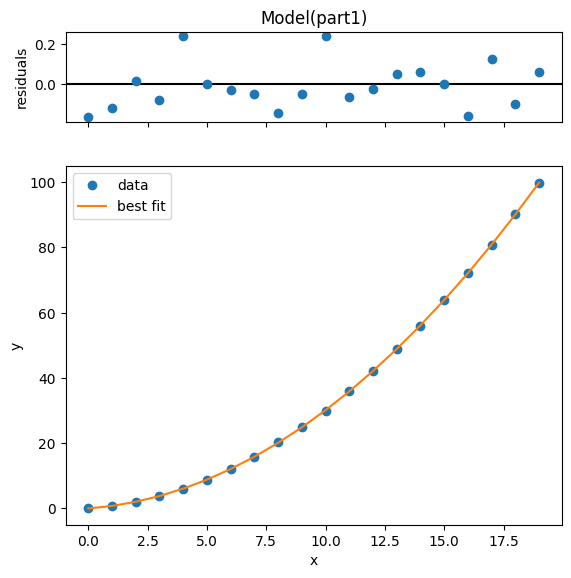

In [2]:
# lmfit_demo - Script showing how the LMfit package works for curve-fitting

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model, Parameters


def aline(x, a, b):
    """
    Function returns a line with independent variable x
    :param x: independent variable
    :param a: slope
    :param b: intercept
    :return: a*x+b
    """
    return a*x+b


def poly(x, **params):
    """
    Polynomial fitting function that takes in a parameter dictionatry which are the polynomial coefficients
    :param x: independent variable
    :param params: keywork argument - dictionary of the form ({'c00': c0, 'c01': c1, etc})
    :return: polynomial function of arbitrary order
    """
    temp= 0.0
    parnames = sorted(params.keys())
    for i, pname in enumerate(parnames):
        temp += params[pname]*x**i
    return temp

def part1(x, a, b):
    return(a*x + b*x**2)

# if __name__ == '__main__':

# Initialize the data to be fit. This data is a quadratic plus some random numbers.
print('Data for curve fit is created using a polynomial function of your choice: y(x) = c(0) + c(1)x + c(2)x**2 + ... c(n)**n: ')
# c = np.array(eval(input('Enter the data coefficients as list [c(0), c(1), c(2)... c(n-1)]: ')))
c = np.array([0.1, 0.5, 0.25]) # test array 

N = 20  # Number of data points
x = np.arange(N)  # x = [0, 1, 2, ... N-1]
y = np.empty(N)
# alpha = eval(input('Enter the estimated error bar: '))
alpha = .1 # error bar
sigma = alpha * np.ones(N)  # Constant error bar
randomState = np.random.RandomState()  # Initialize random state

params_dict = {}
for el in c:
    params_dict.update({'C{0:g}': el})

for i in range(N):
    r = alpha * randomState.normal()  # Generate a Gaussian distributed random vector of length N, mean 0 variance alpha
    temp = 0.0
    for m in range(len(c)):
        temp += c[m] * x[i] ** m
    y[i] = temp + r  # Generate data

model = Model(part1, independent_vars = ['x'])
result = model.fit(y, x=x, a = c[1], b = c[2])

result.params.pretty_print()
print(result.fit_report())
result.plot()
plt.show()

# A nice test case is to try c = [0.1, 0.5, 0.25]



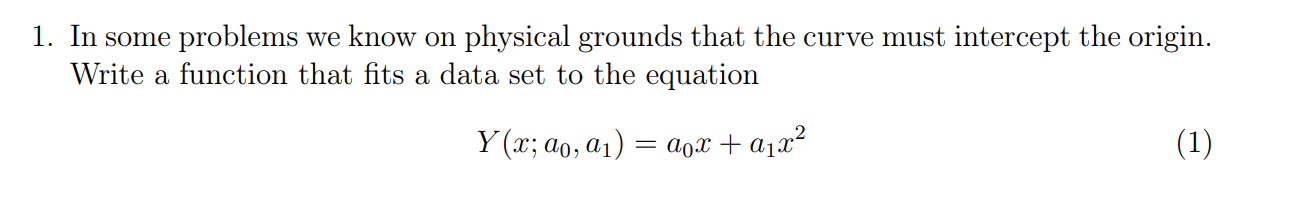

In [5]:
# Balle - Program to compute the trajectory of a baseball using the Euler method.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt

def partTwo(speed, airFlag):
    # Set initial position and velocity of the baseball
    y0 = 0 # m
    r0 = np.array([0., y0])  # Initial vector position
#     velocities = np.arange(5, 50, 5)
#     speed = velocities[0]
    theta = 45 # degrees 

    v0 = np.array([speed * np.cos(theta*np.pi/180), speed * np.sin(theta*np.pi/180)])  # initial velocity
    r = np.copy(r0)  # Set initial position
    v = np.copy(v0)  # Set initial velocity

    # Set physical parameters (mass, Cd, etc.)
    Cd = 0.35  # Drag coefficient (dimensionless)
    area = 4.3e-3  # Cross-sectional area of projectile (m^2)
    mass = 0.145   # Mass of projectile (kg)
    grav = 9.81    # Gravitational acceleration (m/s^2)

    # Set air resistance flag
    # airFlag = eval(input('Add air resistance? (Yes: 1 No: 0)'))
#     airFlag = 0
    if airFlag == 0:
        rho = 0.       # No air resistance
        air_text = '(no air)'
    else:
        rho = 1.2     # Density of air (kg/m^3)
        air_text = '(with air)'
    air_const = -0.5*Cd*rho*area/mass   # Air resistance constant

    # * Loop until ball hits ground or max steps completed
    tau = .01 # (sec)
    maxstep = 1000
    laststep = maxstep

    # Set up arrays for data
    xplot = np.empty(maxstep)
    yplot = np.empty(maxstep)

    x_noAir = np.empty(maxstep)
    y_noAir = np.empty(maxstep)

    for istep in range(maxstep):
        t = istep * tau  # Current time

        # Record computed position for plotting
        xplot[istep] = r[0]
        yplot[istep] = r[1]

        x_noAir[istep] = r0[0] + v0[0]*t
        y_noAir[istep] = r0[1] + v0[1]*t - 0.5*grav*t**2

        # Calculate the acceleration of the ball
        accel = air_const * np.linalg.norm(v) * v  # Air resistance
        accel[1] = accel[1] - grav # update y acceleration to include gravity

        # Calculate the new position and velocity using Euler's method.
        r = r + tau * v  # Euler step
        v = v + tau * accel

        # If the ball reaches the ground (i.e. y < 0), break out of the loop
        if r[1] < 0:
            laststep = istep + 1
            xplot[laststep] = r[0]  # Record last values completed
            yplot[laststep] = r[1]

            # x_noAir[laststep] = r0[0] + v0[0] * t
            # y_noAir[laststep] = r0[1] + v0[1] * t - 0.5 * grav * t ** 2
            break  # Break out of the for loop

    # Print maximum range and time of flight
#     print('Maximum range is {0:.2f} meters'.format(r[0]))
#     print('Time of flight is {0:.1f} seconds'.format(laststep * tau))
    
    xdata = xplot[:laststep+1]
    ydata = yplot[:laststep+1]
    
    model = Model(part1, independent_vars = ['x'])
    ballResult = model.fit(ydata, x=xdata, a = .01, b = .5)
    

#     # Graph the trajectory of the baseball
#     fig, ax = plt.subplots()
#     ax.set_title('Projectile Motion: ' + air_text)
#     # ax.plot(x_noAir[:laststep], y_noAir[:laststep], '-', c='C2', label='Theory (no air)')
#     ax.plot(xplot[:laststep+1], yplot[:laststep+1], '.', label='Euler method', markersize = 4)
#     ax.plot(xplot[:len(ballResult.best_fit)], ballResult.best_fit, '-', label = 'Best fit')
#     # Mark the location of the ground by a straight line
#     ax.plot(np.array([0.0, x_noAir[laststep-1]]), np.array([0.0, 0.0]), '-', color='k')
#     ax.legend(frameon=False)
#     ax.set_xlabel('Range (m)')
#     ax.set_ylabel('Height (m)')

#     plt.show()
    
#     ballResult.params.pretty_print()
#     print(ballResult.fit_report())
#     ballResult.plot()
#     plt.show()
#     print(ballResult.chisqr)
    
    return(ballResult.chisqr)
    
    
tol = .1
for v in np.arange(10, 20, .005):
    x = partTwo(v, 0)
    y = partTwo(v, 1)
    if y > tol:
        print(f'Broke at velocity = {v} chisqr = {y}')
        break


Broke at velocity = 12.24000000000035 chisqr = 0.10234399985684371


In [4]:
tol = .05
va = 1_000_000
for v in np.arange(va, va*2, 500_000):
    x = partTwo(v, 0)
#     y = partTwo(v, 1)
    print(x)
    if x > tol:
        print(f'Broke at velocity = {v} chisqr = {x}')
        break
    


7.472396659970124e-13
4.482443872798914e-14
